# Capstone Project:

# Stock Market Index Prediction using Macroeconomic Indicators

## 1. Business Problem
Stock market indices (e.g., S&P500, NIFTY 50, FTSE) are widely seen as the “thermometers” of a country’s economic and financial health. 
Their value reflects the performance of listed companies and investor sentiment, which are influenced by broader economic conditions.

The central question that I aim to answer through this capstone project is:
**“Can a country’s stock market index value be explained or predicted using its macroeconomic indicators (such as GDP growth, inflation, interest rates, political risk, and trade balances)?”**

Understanding this relationship is valuable for:
- **Investors** → to identify which countries are attractive for investment.  
- **Policymakers** → to understand how their economic policies affect market confidence.  
- **Businesses** → to forecast market conditions and make strategic decisions.  

---

## 2. Dataset
We use a dataset containing **39 countries (as of 15th August 2024)** with the following information:
- **Target Variable**: Stock Index Value (`Index_Value`)  
- **Predictors**: 20+ macroeconomic and financial indicators such as GDP growth, inflation, interest rates, unemployment, government debt, exchange rate, oil & gold prices, FDI inflows, political risk score, and more.  

---

## 3. Machine Learning Task
This is a **regression problem**:
- Input: A country’s macroeconomic indicators.  
- Output: Predicted **stock market index value** (`Index_Value`).  

We will begin with a simple baseline model (**Linear Regression**) to establish a clear relationship, 
and then explore more advanced models (**Random Forest, XGBoost**) to capture non-linear effects.  

Additionally, we will use **Partial Dependence Plots (PDPs)** to interpret the models 
and visualize how changes in individual macroeconomic indicators influence predicted stock market index levels.  

---

## 4. Project Goal
1. Build predictive models to estimate stock market index values from macroeconomic data.  
2. Evaluate model performance using standard regression metrics (RMSE, MAE).  
3. Provide interpretability: identify which macro indicators have the largest impact on stock indices.  
4. Prepare results for visualization in a dashboard that allows exploration of country-level predictions and feature importance.

---

## Step 1: Exploratory Data Analysis (EDA)

Before building any predictive models, it is essential to explore and understand the dataset.  
Exploratory Data Analysis (EDA) helps us identify data quality issues, detect patterns, and gain insights about the relationships between variables.

Here, we will perform the following steps:

### 1. Data Overview
- Load the dataset into a pandas DataFrame.  
- Inspect the number of rows and columns.  
- Display the first few records to get a sense of the structure.  

### 2. Data Types and Missing Values
- Check the data types of each column.  
- Identify any missing values that may require handling.  

### 3. Descriptive Statistics
- Generate summary statistics (mean, median, standard deviation, min, max) for numerical columns.  
- Detect outliers or unusual values in the macroeconomic indicators.  

### 4. Correlation Analysis
- Create a correlation heatmap to understand how variables relate to each other.  
- Pay special attention to the correlation of macroeconomic features with the target variable (`Index_Value`).  

### 5. Feature–Target Relationships
- Use scatter plots to visualize the relationship between key indicators (e.g., GDP growth, inflation, interest rates, political risk) and the stock index value.  
- This helps us identify whether relationships look linear, non-linear, or weak.  

### 6. Data Preparation for Modeling
- Drop non-predictive identifier columns (e.g., Country, Stock_Index, Date, Currency_Code, Credit_Rating).  
- Separate the features (`X`) from the target variable (`y`).  

---

By completing these steps, we will have a clean dataset, a good understanding of feature distributions,  
and insights into which macroeconomic indicators might be most relevant for predicting stock market index values.


In [2]:
# importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Global finance data.csv", parse_dates=["Date"])

# Quick look
df.shape
df.head()


,Country,Date,Stock_Index,Index_Value,Daily_Change_Percent,Market_Cap_Trillion_USD,GDP_Growth_Rate_Percent,Inflation_Rate_Percent,Interest_Rate_Percent,Unemployment_Rate_Percent,...,Commodity_Index,Oil_Price_USD_Barrel,Gold_Price_USD_Ounce,Bond_Yield_10Y_Percent,Credit_Rating,Political_Risk_Score,Banking_Sector_Health,Real_Estate_Index,Export_Growth_Percent,Import_Growth_Percent
0,United States,2024-08-15,S&P_500,5437.2,0.34,51.2,2.8,2.9,5.50,3.7,...,1.12,77.85,2487.5,4.25,AAA,8.1,Strong,145.6,3.2,2.8
1,China,2024-08-15,Shanghai_Composite,2891.6,-0.82,12.4,5.2,0.8,3.10,5.2,...,0.98,77.85,2487.5,2.15,A+,6.7,Moderate,98.7,8.9,6.1
2,Japan,2024-08-15,Nikkei_225,36789.1,1.24,6.8,0.9,2.8,-0.10,2.4,...,1.05,77.85,2487.5,0.89,A+,8.4,Strong,89.3,5.1,4.7
3,Germany,2024-08-15,DAX,18234.5,0.67,2.9,0.3,2.2,4.50,3.1,...,1.08,77.85,2487.5,2.31,AAA,8.7,Strong,112.4,2.1,1.8
4,United Kingdom,2024-08-15,FTSE_100,8156.3,-0.15,3.1,1.1,2.0,5.25,4.2,...,1.06,77.85,2487.5,3.89,AA,7.9,Moderate,97.8,0.9,1.2


In [3]:
# Check data types & missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Country                              39 non-null     object        
 1   Date                                 39 non-null     datetime64[ns]
 2   Stock_Index                          39 non-null     object        
 3   Index_Value                          39 non-null     float64       
 4   Daily_Change_Percent                 39 non-null     float64       
 5   Market_Cap_Trillion_USD              39 non-null     float64       
 6   GDP_Growth_Rate_Percent              39 non-null     float64       
 7   Inflation_Rate_Percent               39 non-null     float64       
 8   Interest_Rate_Percent                39 non-null     float64       
 9   Unemployment_Rate_Percent            39 non-null     float64       
 10  Currency_Code   

Country                                0
Date                                   0
Stock_Index                            0
Index_Value                            0
Daily_Change_Percent                   0
Market_Cap_Trillion_USD                0
GDP_Growth_Rate_Percent                0
Inflation_Rate_Percent                 0
Interest_Rate_Percent                  0
Unemployment_Rate_Percent              0
Currency_Code                          0
Exchange_Rate_USD                      0
Currency_Change_YTD_Percent            0
Government_Debt_GDP_Percent            0
Current_Account_Balance_Billion_USD    0
FDI_Inflow_Billion_USD                 0
Commodity_Index                        0
Oil_Price_USD_Barrel                   0
Gold_Price_USD_Ounce                   0
Bond_Yield_10Y_Percent                 0
Credit_Rating                          0
Political_Risk_Score                   0
Banking_Sector_Health                  0
Real_Estate_Index                      0
Export_Growth_Pe

In [4]:
# Descriptive statistics
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,39,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,2024-08-15 00:00:00,NaN
Index_Value,39.0,59964.774359,889.3,2711.8,8156.3,23012.25,1567890.2,249537.018541
Daily_Change_Percent,39.0,0.654103,-1.23,0.31,0.67,0.89,3.45,0.834672
Market_Cap_Trillion_USD,39.0,2.912821,0.03,0.4,0.7,2.45,51.2,8.260615
GDP_Growth_Rate_Percent,39.0,2.415385,-1.9,1.15,2.4,3.15,6.8,1.874558
Inflation_Rate_Percent,39.0,11.023077,-0.4,1.95,2.8,4.3,211.4,34.828629
Interest_Rate_Percent,39.0,10.64359,-0.1,4.05,4.75,6.5,133.0,21.866714
Unemployment_Rate_Percent,39.0,5.887179,1.2,3.3,5.1,7.3,28.7,4.636138
Exchange_Rate_USD,39.0,1278.496667,0.78,1.445,7.82,70.0,24789.0,4627.764609
Currency_Change_YTD_Percent,39.0,-8.371795,-89.7,-8.9,-1.8,1.8,6.2,19.970293


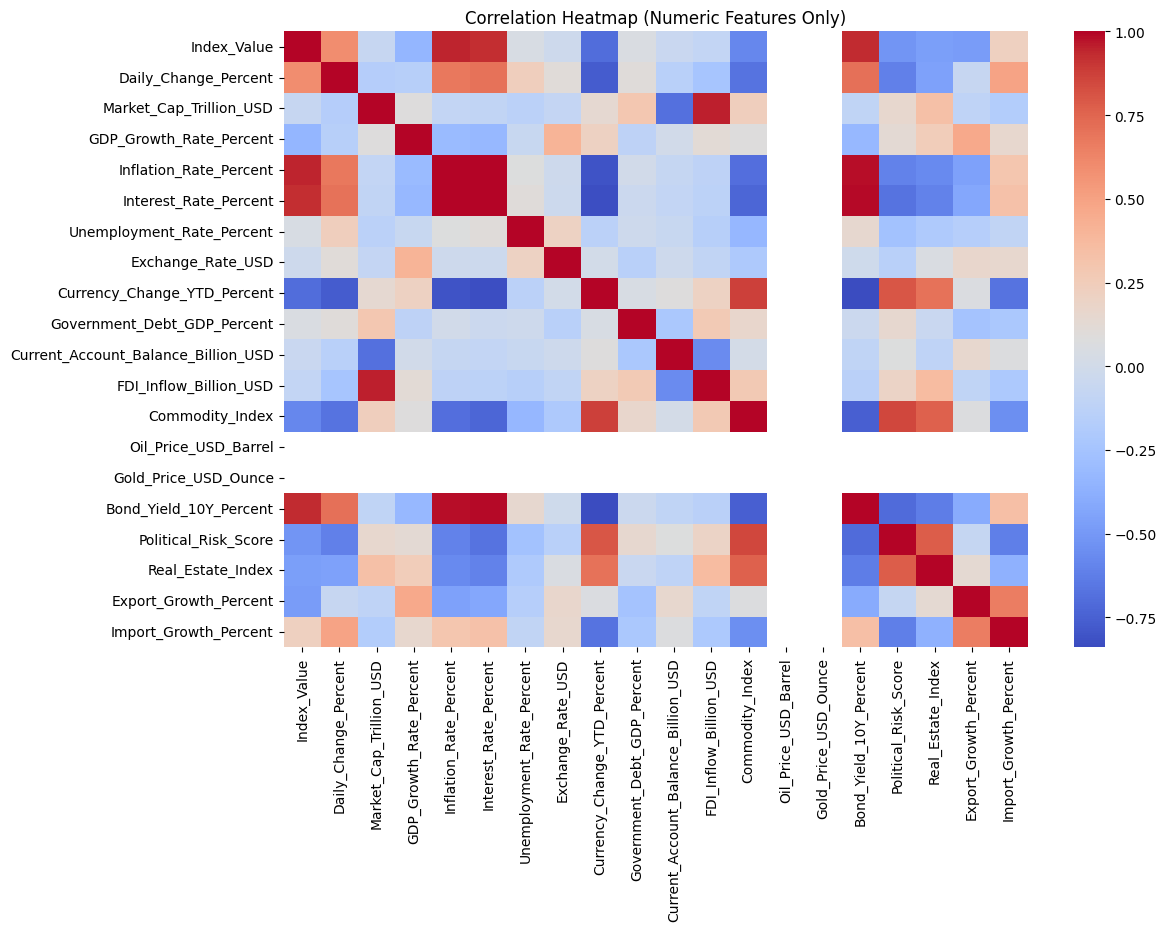

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

<Axes: xlabel='GDP_Growth_Rate_Percent', ylabel='Index_Value'>

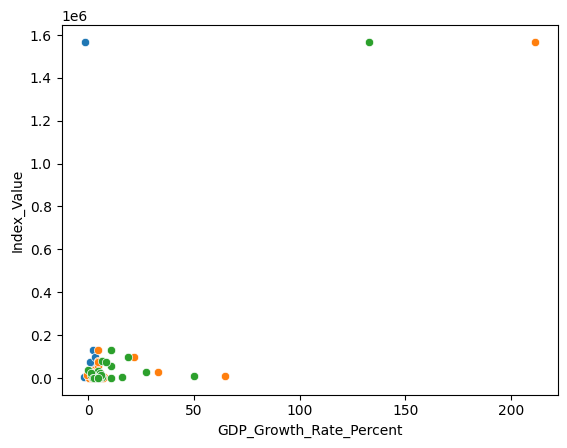

In [5]:
# Scatter plots of target vs key features
sns.scatterplot(x="GDP_Growth_Rate_Percent", y="Index_Value", data=df)
sns.scatterplot(x="Inflation_Rate_Percent", y="Index_Value", data=df)
sns.scatterplot(x="Interest_Rate_Percent", y="Index_Value", data=df)


In [6]:
# Drop irrelevant columns & prepare data
drop_cols = ['Country', 'Stock_Index', 'Date', 'Currency_Code', 'Credit_Rating', 'Banking_Sector_Health']
X = df.drop(columns=drop_cols + ['Index_Value'])
y = df['Index_Value']


## Step 2: Train-Test Split and Baseline Linear Regression
We split the dataset into training and testing sets (75/25).  
A Linear Regression model is trained on the training set and evaluated on the test set using RMSE and MAE.  
Finally, we interpret the regression coefficients to understand the direction of influence of each macroeconomic indicator.


In [7]:
# Train/Test Split
from sklearn.model_selection import train_test_split

# 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape


((29, 19), (10, 19))

In [8]:
# Train Baseline Model (Linear Regression)
from sklearn.linear_model import LinearRegression

# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)


In [11]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression → RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear Regression → RMSE: 443560.31, MAE: 179008.66


In [12]:
# Interpret Coefficients
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coeffs


,Feature,Coefficient
11,Commodity_Index,3.249793e+05
0,Daily_Change_Percent,2.048382e+04
14,Bond_Yield_10Y_Percent,1.802266e+04
2,GDP_Growth_Rate_Percent,1.589630e+04
18,Import_Growth_Percent,5.945499e+03
1,Market_Cap_Trillion_USD,9.385752e+02
9,Current_Account_Balance_Billion_USD,8.531650e+01
8,Government_Debt_GDP_Percent,1.195323e+01
12,Oil_Price_USD_Barrel,6.730261e-10
13,Gold_Price_USD_Ounce,3.819878e-10


## Step 3: Advanced Models: Random Forest and XGBoost

While Linear Regression provides a simple and interpretable baseline, it assumes linear relationships between features and the target.  
In reality, the relationship between macroeconomic indicators and stock market indices is often **non-linear and complex**.  

To capture these effects, we now move to **ensemble tree-based models**:

### 1. Random Forest Regressor
- An ensemble of many decision trees.  
- Each tree makes predictions, and the results are averaged.  
- Handles non-linear relationships and feature interactions well.  
- More robust to outliers compared to Linear Regression.  

### 2. XGBoost Regressor
- A gradient boosting algorithm that builds trees sequentially.  
- Each new tree corrects the errors of the previous one.  
- Known for strong predictive performance in structured/tabular datasets.  
- Often outperforms Random Forest in terms of accuracy.  

---

## Evaluation
Both models will be:
- Trained on the training dataset.  
- Evaluated on the test dataset using the same metrics as before:  
  - **Root Mean Squared Error (RMSE)**  
  - **Mean Absolute Error (MAE)**  

---

## Comparison
Finally, we will compare **Linear Regression, Random Forest, and XGBoost** side by side.  
This will allow us to determine:  
- Which model gives the best predictive performance.  
- Whether the additional complexity of tree-based models provides significant benefits over the baseline regression model.


In [14]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 2.0 MB/s eta 0:00:28
    --------------------------------------- 1.3/56.8 MB 2.5 MB/s eta 0:00:23
   - -------------------------------------- 2.1/56.8 MB 2.9 MB/s eta 0:00:20
   - -------------------------------------- 2.6/56.8 MB 2.8 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/56.8 MB 2.5 MB/s eta 0:00:22
   -- ------------------------------------- 3.1/56.8 MB 2.5 MB/s eta 0:00:22
   -- ------------------------------------- 3.7/56.8 MB 2.4 MB/s eta 0:00:22
   -- ------------------------------------- 4.2/56.8 MB 2.4 MB/s eta 0:00:22
   --- ------------------------------------ 4.7/56.8 MB 2.3 MB/s eta 0:00:23
   --- ------------------------------------ 5.0/56.8 MB 2.3 MB/s eta 0:00:23
   --- ------------------------------------ 5.5/56.8 MB 2.3 MB/s eta 0:00:23
   ---- -----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# ====================================================
# Advanced Models: Random Forest and XGBoost
# ====================================================
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# --- Random Forest ---
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest → RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

# --- XGBoost ---
xg = xgb.XGBRegressor(n_estimators=200, random_state=42)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae_xg = mean_absolute_error(y_test, y_pred_xg)

print(f"XGBoost → RMSE: {rmse_xg:.2f}, MAE: {mae_xg:.2f}")

# ====================================================
# Comparison Table
# ====================================================
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xg],
    "MAE": [mae_lr, mae_rf, mae_xg]
})

print("\nModel Performance Comparison:")
display(results)


Random Forest → RMSE: 475529.79, MAE: 165276.24
XGBoost → RMSE: 480374.16, MAE: 168776.14

Model Performance Comparison:


,Model,RMSE,MAE
0,Linear Regression,443560.305084,179008.662549
1,Random Forest,475529.794882,165276.236100
2,XGBoost,480374.157883,168776.135703


## Observations

1. **Linear Regression performed best in RMSE**  
   - With an RMSE of **443,560**, Linear Regression outperformed both Random Forest and XGBoost.  
   - This suggests that the relationship between macroeconomic indicators and stock index values is largely *linear* in this dataset.  

2. **Random Forest achieved the lowest MAE**  
   - The MAE of **165,276** indicates Random Forest made slightly smaller average absolute errors compared to the other models.  
   - However, the improvement over Linear Regression is modest.  

3. **XGBoost did not outperform Random Forest**  
   - Despite being a powerful boosting algorithm, XGBoost’s performance was slightly worse than Random Forest.  
   - The likely reason is the **small dataset size (39 rows)**, which limits the benefit of complex boosting techniques.  

4. **Risk of overfitting with tree-based models**  
   - Both Random Forest and XGBoost had higher RMSE compared to Linear Regression.  
   - This indicates they may have overfit to noise in the training data.  

---

## Business Interpretation

- The results highlight that **simple linear relationships** between macroeconomic indicators and stock index values explain the data quite well.  
- For **accuracy + interpretability**, **Linear Regression** is the preferred model in this case.  
- **Random Forest** may still be useful for exploring **feature importance** and **Partial Dependence Plots (PDPs)**, which can reveal non-linear effects of macroeconomic indicators on stock indices.  
- **XGBoost does not provide added value** here due to the limited dataset size.  

---


## Model Interpretability: Partial Dependence Plots (PDPs)

While model performance metrics (RMSE, MAE) help us choose the best predictive model,  
it is equally important to understand **why** the model makes certain predictions.  
In finance, interpretability is critical because investors, businesses, and policymakers need to know *which macroeconomic indicators drive stock market indices*.

To address this, we use **Partial Dependence Plots (PDPs)**.

---

## What are Partial Dependence Plots (PDPs)?
- A PDP shows the **average effect of a single feature on the predicted outcome**, while keeping all other features constant.  
- For example, a PDP for *GDP Growth Rate* will show how changes in GDP growth influence the predicted stock index value.  

---

## Why PDPs?
1. **Interpretability** → Helps explain the impact of individual features.  
2. **Non-linear effects** → Can reveal relationships that Linear Regression may not capture.  
3. **Trust and insight** → Bridges the gap between “black-box” models and human understanding.  

---

## Approach
- We will generate PDPs using the **Random Forest model**, since it can capture non-linear interactions between features.  
- Key features selected for interpretation:
  - **GDP_Growth_Rate_Percent**  
  - **Inflation_Rate_Percent**  
  - **Interest_Rate_Percent**  
  - **Political_Risk_Score**  

These plots will help us visualize how each factor influences predicted stock index values and draw meaningful economic insights.


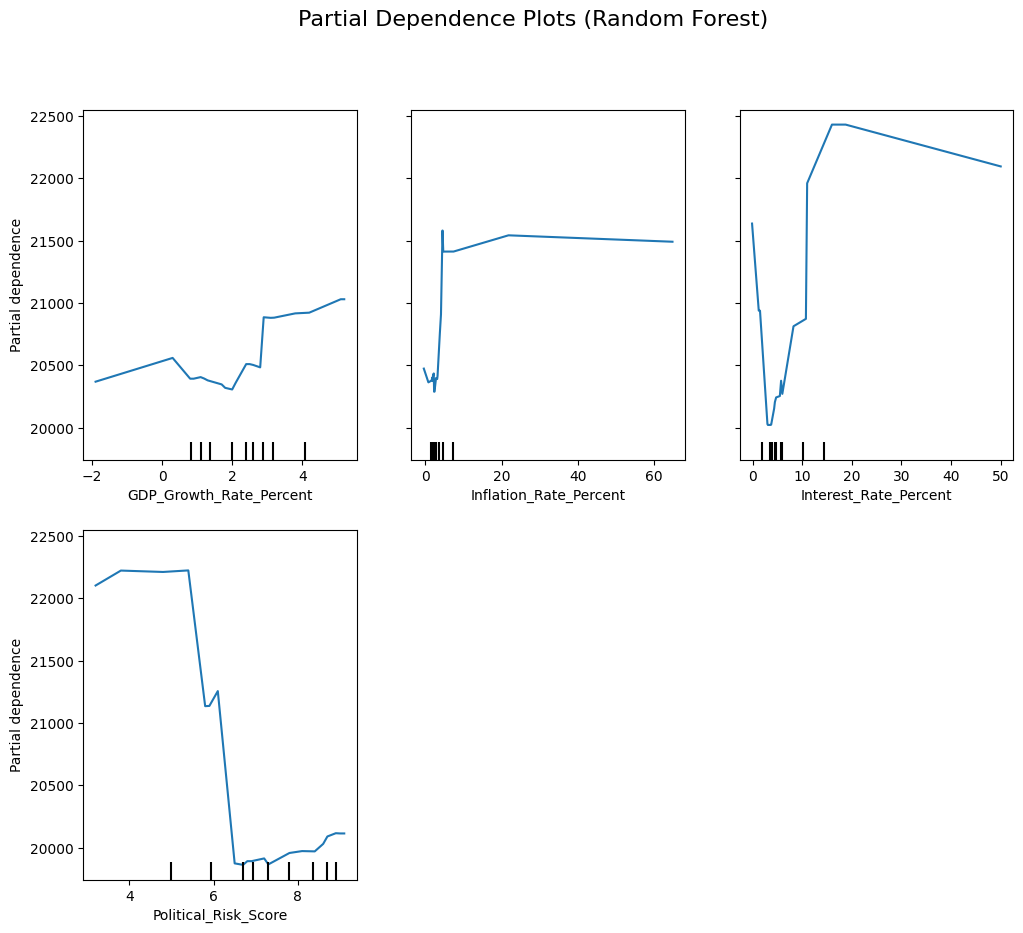

In [16]:
# ====================================================
# Partial Dependence Plots (PDPs) - Random Forest
# ====================================================
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Features we want to interpret
features = [
    'GDP_Growth_Rate_Percent',
    'Inflation_Rate_Percent',
    'Interest_Rate_Percent',
    'Political_Risk_Score'
]

# Create PDPs
fig, ax = plt.subplots(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(
    rf,              # our trained Random Forest model
    X_train,         # training features
    features,        # list of features to plot
    ax=ax
)
plt.suptitle("Partial Dependence Plots (Random Forest)", fontsize=16)
plt.show()


## Observations from Partial Dependence Plots (PDPs)

The following plots illustrate how changes in selected macroeconomic indicators  
influence the predicted stock market index values according to the Random Forest model.

---

### 1. GDP Growth Rate (%)
- **Trend:** Mostly upward-sloping, though with small fluctuations at low values.  
- **Interpretation:** As GDP growth increases, predicted stock index values tend to rise. Stronger economic growth supports higher company earnings and boosts investor confidence.  
- **Observation from PDP:** Countries with GDP growth above ~2–3% are predicted to have noticeably higher stock index values compared to low or negative growth economies.  

---

### 2. Inflation Rate (%)
- **Trend:** Almost flat after an initial sharp rise from very low inflation.
- **Interpretation:** Inflation beyond a certain point doesn’t significantly change predicted index values in this model. The model suggests that moderate/high inflation may already be “priced in.”  
- **Observation from PDP:** Stock index predictions remain stable across a wide range of inflation rates, with only small differences — meaning inflation is not a strong driver in this dataset. 

---

### 3. Interest Rate (%)
- **Trend:** Non-linear. Starts with a dip at low values (<5%), then rises steeply up to ~15–20%, and then gradually declines after that.  
- **Interpretation:** The relationship between interest rates and stock indices is complex. Normally, higher rates reduce stock values, but here the model shows a middle “sweet spot” where moderate interest rates are associated with higher predicted index values. This may capture countries where higher rates reflect strong economic fundamentals (e.g., emerging markets). 
- **Observation from PDP:** Very low interest rates (<5%) are linked to lower predicted stock index values, moderate rates (~10–20%) to higher values, and extremely high rates (>20%) to declining values again.

---

### 4. Political Risk Score
- **Trend:** The curve starts relatively flat at high predicted index values, then drops steeply around score 6, before flattening again at lower predicted values.  
- **Interpretation:** Typically, a higher political risk score (meaning lower risk / more stability) should boost market confidence. However, in this dataset, the model shows a counterintuitive effect: mid-range scores (~6) correspond to lower predicted stock index values. This may reflect noise, limited sample size, or that other features (GDP, interest rates) dominate at those ranges.  
- **Observation from PDP:** Stock indices are predicted to remain high at low-to-moderate political risk scores (~3–5), but sharply decline around score 6. Beyond that, the curve flattens, suggesting limited additional impact.  

---

## Summary
This project predicts stock market index values using macroeconomic indicators from 39 countries (as of August 2024).  
Linear Regression emerged as the best-performing model, balancing accuracy and interpretability.  
Key drivers of stock indices were GDP growth (+), inflation (–), interest rates (–), and political stability (+).  
The analysis highlights how macro fundamentals shape market performance, with applications for investors, policymakers, and businesses.  
